<a href="https://colab.research.google.com/github/fblissjr/streamlit-demos/blob/main/flights_delay_analysis_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis based on the YouTube stream**
by Medallion Data Science, by Rob Mulla https://www.kaggle.com/robikscube

[https://www.youtube.com/watch?v=xs_L6z9QNYY](http://)

https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr

LIVE CODING: Flight Data Exploration with Pandas & Python

This one is very interesting exersize and is related to my line of work.

The datasets are very large in the csv format and RAM intensive. Not sure if can be be handled in parquet format.

![week-3-airline-delays-880-by-440.png](attachment:a31cac82-893f-49ba-86b0-69bb47c8cb54.png)

### 1. Install packages

pip install package Calmap for plotting of calender plot.

In [1]:
!pip install calmap --upgrade --quiet #> /dev/null# if not installed.

In [2]:
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fredbliss","key":"3db2a54e60e4c1ae5f5eaf05d4c86518"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

In [6]:
! kaggle datasets download -d robikscube/flight-delay-dataset-20182022

100% 3.72G/3.73G [00:34<00:00, 137MB/s]
100% 3.73G/3.73G [00:34<00:00, 115MB/s]


In [11]:
! mkdir ../input
! mkdir ../input/flight-delay-dataset-20182022

mkdir: cannot create directory ‘../input’: File exists


In [13]:
! unzip /content/flight-delay-dataset-20182022.zip -d ../input/flight-delay-dataset-20182022

Archive:  /content/flight-delay-dataset-20182022.zip
  inflating: ../input/flight-delay-dataset-20182022/Airlines.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2018.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2018.parquet  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2019.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2019.parquet  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2020.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2020.parquet  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2021.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2021.parquet  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2022.csv  
  inflating: ../input/flight-delay-dataset-20182022/Combined_Flights_2022.parquet  
  inflating: ../input/flight-delay-dataset-20182022/raw/Flig

In [3]:
!pip install plotly-calplot --upgrade --quiet #> /dev/null# if not installed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import calmap
from plotly_calplot import calplot
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-dark-palette')
#%load_ext lab_black

In [ ]:
# plt.style.available # Matplotlib styles

### 2. Loading files

Selected only the 2019 csv file in the begining due to size. glob overloaded the RAM.
parquet files are significantly smaller.

In [ ]:
parquet_files = glob.glob('../input/flight-delay-dataset-20182022/Combined_Flights_*.parquet')
#csv_files = glob.glob('../input/flight-delay-dataset-20182022/Combined_Flights_201*.csv') #2018/2019 to save memory
#csv_files = ('../input/flight-delay-dataset-20182022/Combined_Flights_2019.csv') #now 2019 to save memory. 
# The files are RAM intensive and covers the period from 2018 to 2022.

In [ ]:
parquet_files

['../input/flight-delay-dataset-20182022/Combined_Flights_2022.parquet',
 '../input/flight-delay-dataset-20182022/Combined_Flights_2021.parquet',
 '../input/flight-delay-dataset-20182022/Combined_Flights_2018.parquet',
 '../input/flight-delay-dataset-20182022/Combined_Flights_2020.parquet',
 '../input/flight-delay-dataset-20182022/Combined_Flights_2019.parquet']

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup',
       'DivAirportLandings'],
      dtype='object')

### 3. Subsetting & choosing specific columns

In [ ]:
column_subset = [
    "FlightDate",
    "Airline",
    "Tail_Number",
    "Flight_Number_Marketing_Airline",
    "Origin",
    "Dest",
    "Cancelled",
    "Diverted",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
]


In [ ]:
dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=column_subset))
df = pd.concat(dfs).reset_index(drop=True)

In [ ]:
df = pd.concat(dfs).reset_index(drop=True)

In [ ]:
cat_col = ['Airline','Origin','Dest','OriginStateName','DestStateName']
for c in cat_col:
    df[c] = df[c].astype("category") 
    
# Converting to type category to reduce the file size.
# Even with subsets the load on the RAM remained high.

### 4. EDA

In [ ]:
#df.tail()

Airlines with the most flights:

In [ ]:
df['Airline'].value_counts() # highrarcy my most flights

Southwest Airlines Co.                       5474339
Delta Air Lines Inc.                         3294917
SkyWest Airlines Inc.                        3159683
American Airlines Inc.                       3134117
United Air Lines Inc.                        2354538
Republic Airlines                            1283704
JetBlue Airways                              1106079
Envoy Air                                    1072778
Endeavor Air Inc.                             998224
Comair Inc.                                   957220
Alaska Airlines Inc.                          906259
Spirit Air Lines                              836694
Mesa Airlines Inc.                            749216
Frontier Airlines Inc.                        570452
Allegiant Air                                 489400
Horizon Air                                   471153
Capital Cargo International                   392011
Air Wisconsin Airlines Corp                   380202
ExpressJet Airlines Inc.                      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 22 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Airline                          category      
 2   Tail_Number                      object        
 3   Flight_Number_Marketing_Airline  int64         
 4   Origin                           category      
 5   Dest                             category      
 6   Cancelled                        bool          
 7   Diverted                         bool          
 8   CRSDepTime                       int64         
 9   DepTime                          float64       
 10  DepDelayMinutes                  float64       
 11  OriginAirportID                  int64         
 12  OriginCityName                   object        
 13  OriginStateName                  category      
 14  DestAirportID                   

Ploting the delays distribution:

<AxesSubplot:title={'center':'Flight Delay (Minutes)'}, ylabel='Frequency'>

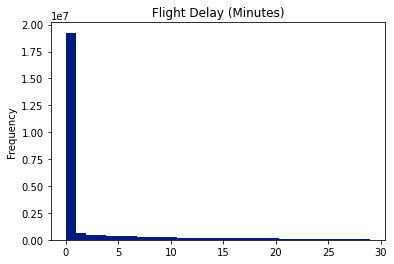

In [ ]:
df.query('DepDelayMinutes < 30')['DepDelayMinutes'].plot(kind='hist', bins=30,
                                                        title='Flight Delay (Minutes)')

# As most of the flights are with no delay (0 min), It is seen that the '0' is the highest accumulation, which overshadows the real delays.

<AxesSubplot:title={'center':'Flight Delay (Minutes)'}, ylabel='Frequency'>

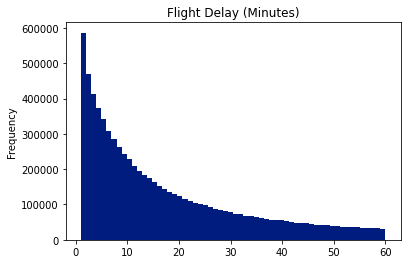

In [ ]:
df.query('(DepDelayMinutes > 0) and (DepDelayMinutes < 61)')['DepDelayMinutes'].plot(kind='hist', bins=60,
                                                                                     title='Flight Delay (Minutes)')
# Zero '0' minute delays are excluded.

### 5. Delays Categories

According to Wikipedia: https://en.wikipedia.org/wiki/Flight_cancellation_and_delay
Delays are divided into three categories, namely;
- "on time or small delay" (up to 15 minutes delay), 
- "Medium delay" (15 – 45 minutes delay) and,
- "Large delay" ( 45 minutes delay). 
The naming can vary among Airlines.


In [ ]:
# df[df['DepDelayMinutes'].isna()] -- Cancelled flights

In [ ]:
df['DelayGroup'] = None
df.loc[df['DepDelayMinutes'] == 0, 'DelayGroup'] = 'OnTime_Early'
df.loc[(df['DepDelayMinutes'] > 0) & (df['DepDelayMinutes'] <= 15), 'DelayGroup'] = 'Small_Delay'
df.loc[(df['DepDelayMinutes'] > 15) & (df['DepDelayMinutes'] <= 45), 'DelayGroup'] = 'Medium_Delay'
df.loc[df['DepDelayMinutes'] > 45, 'DelayGroup'] = 'Large_Delay'
df.loc[df['Cancelled'], 'DelayGroup'] = 'Cancelled'

# Generally 0-15 min delays are considered not significant. 
# Usually it can be made up for with an earlier arrival,

In [ ]:
df.head()

,FlightDate,Airline,Tail_Number,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",N21144,4301,GJT,DEN,False,False,1133,1123.0,0.0,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245,1228.0,0.0,OnTime_Early
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",N16170,4299,HRL,IAH,False,False,732,728.0,0.0,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,849,848.0,0.0,OnTime_Early
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",N21144,4298,DRO,DEN,False,False,1529,1514.0,0.0,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,21.0,14.0,1639,1636.0,0.0,OnTime_Early
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",N11184,4296,IAH,GPT,False,False,1435,1430.0,0.0,12266,"Houston, TX",Texas,11973,"Gulfport/Biloxi, MS",Mississippi,16.0,4.0,1605,1547.0,0.0,OnTime_Early
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",N17146,4295,DRO,DEN,False,False,1135,1135.0,0.0,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,19.0,8.0,1245,1251.0,6.0,OnTime_Early


### 6. Cancellations and Diversions:
- Cancelled flights

In [ ]:
print(df['Cancelled'].value_counts())
print('Percent Cancelled :', round(sum(df['Cancelled'] == True) / len(df['Cancelled']) * 100, 2), '% of all flights')

False    28416515
True       777267
Name: Cancelled, dtype: int64
Percent Cancelled : 2.66 % of all flights


- Diverted flights

In [ ]:
print(df['Diverted'].value_counts())
print('Percent Diverted :', round(sum(df['Diverted'] == True) / len(df['Diverted']) * 100, 2), '% of all flights') 

False    29125433
True        68349
Name: Diverted, dtype: int64
Percent Diverted : 0.23 % of all flights


In [ ]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(data=df[df['DelayGroup'] == 'Large_Delay'], x='DepDelayMinutes', y='ArrDelayMinutes')

In [ ]:
#Diverted = df[df['Diverted'] == True]

In [ ]:
df['DelayGroup'].value_counts()

OnTime_Early    19240509
Small_Delay      4434918
Medium_Delay     2515582
Large_Delay      2224393
Cancelled         777267
Name: DelayGroup, dtype: int64

In [ ]:
#Diverted['DelayGroup'].value_counts()

In [ ]:
pal = sns.color_palette()

### 7. Plotting the delay groups

<AxesSubplot:title={'center':'Delay Category'}>

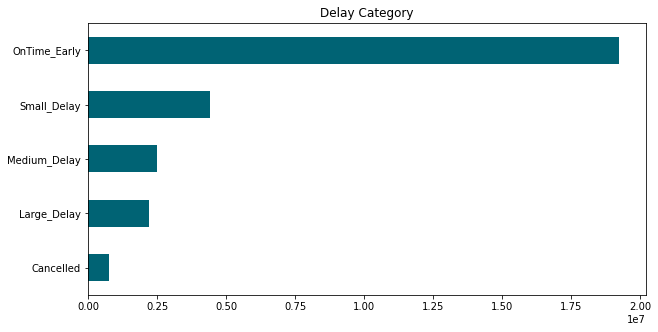

In [ ]:
df['DelayGroup'].value_counts(ascending=True).plot(kind='barh', color=pal[5], title='Delay Category', figsize=(10,5))

In [ ]:
df['DelayGroup'].isna().sum()

1113

In [ ]:
#Diverted['DelayGroup'].value_counts(ascending=True).plot(kind='barh', color=pal[4], title='Delay Category - Diverted -', figsize=(10,5))

Diversion implies that the aircraft is diverted to a different destination field. This has no impact in depature delay calculations.

In [ ]:
print((df['DelayGroup'].value_counts() / df.shape[0] * 100).round(2))
print(sum(df['DelayGroup'].value_counts() / df.shape[0] * 100))

OnTime_Early    65.91
Small_Delay     15.19
Medium_Delay     8.62
Large_Delay      7.62
Cancelled        2.66
Name: DelayGroup, dtype: float64
99.99618754432022


In [ ]:
#df[df['DelayGroup'].isna()]

In [ ]:
df['DelayGroup'].value_counts(normalize=True) * 100 # normalize to return proportions rather than frequencies.

OnTime_Early    65.908701
Small_Delay     15.191889
Medium_Delay     8.617170
Large_Delay      7.619697
Cancelled        2.662542
Name: DelayGroup, dtype: float64

Text(0.5, 0.98, 'Delay Groups')

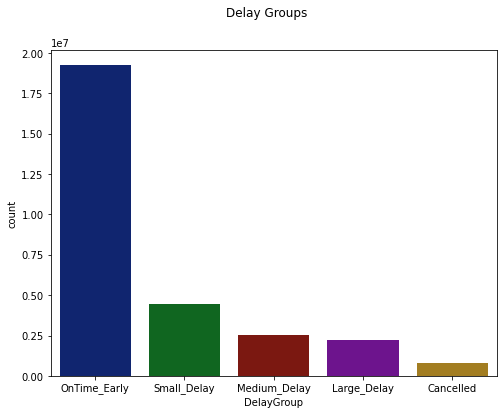

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='DelayGroup')
plt.suptitle('Delay Groups')

In [ ]:
df['FlightDate'] = pd.to_datetime(df['FlightDate']) # Original as object.

In [ ]:
df['FlightDate'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                29193782
unique                   1673
top       2019-12-01 00:00:00
freq                    24739
first     2018-01-01 00:00:00
last      2022-07-31 00:00:00
Name: FlightDate, dtype: object

In [ ]:
df['Month'] = df['FlightDate'].dt.month  # Extract the months.

In [ ]:
df_agg = df.groupby('Month')['DelayGroup'].value_counts(normalize=True).unstack() * 100 # Grouping by month and unstacking the delay group
col_order = ['OnTime_Early','Small_Delay','Medium_Delay','Large_Delay','Cancelled'] # resorting the columns.
df_agg[col_order].style.background_gradient(cmap='Blues')

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,68.169907,13.961832,7.878093,7.008976,2.981192
2,64.960611,15.300969,8.828322,7.786858,3.123240
3,66.363322,14.172305,7.716007,6.173113,5.575252
4,64.436275,14.051844,7.824258,6.853866,6.833756
5,65.023841,16.224252,8.965554,7.875154,1.911198
6,59.488265,17.349791,10.754222,10.442093,1.965629
7,61.996702,16.361900,10.052315,9.906083,1.683000
8,64.622096,15.009025,9.096512,9.137345,2.135022
9,72.924881,13.140776,6.725733,5.813787,1.394822


### 8. Calender delay map

<AxesSubplot:>

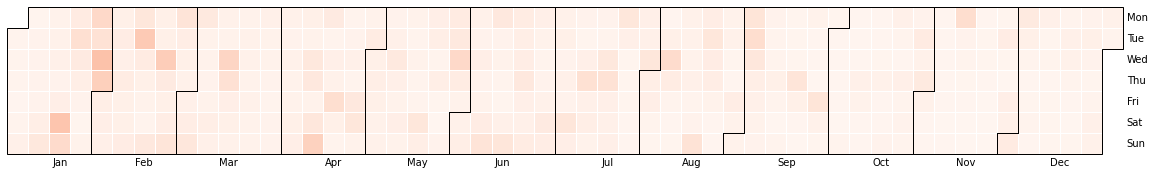

In [ ]:
events = df.groupby('FlightDate')['Cancelled'].mean()
fig, ax = plt.subplots(figsize=(20,10))
calmap.yearplot(events, year=2019, monthly_border=True)

In [ ]:
'''
events = df.groupby('FlightDate')['Cancelled'].mean()
fig, ax = plt.subplots(figsize=(20,10))
calmap.yearplot(events, year=2019, monthly_border=True)
calmap.yearplot(events.apply(np.log), year=2019, monthly_border=True)
# Applying log scaling.
'''

"\nevents = df.groupby('FlightDate')['Cancelled'].mean()\nfig, ax = plt.subplots(figsize=(20,10))\ncalmap.yearplot(events, year=2019, monthly_border=True)\ncalmap.yearplot(events.apply(np.log), year=2019, monthly_border=True)\n# Applying log scaling.\n"

Text(0.4, 0.9, 'US Flight Cancellations')

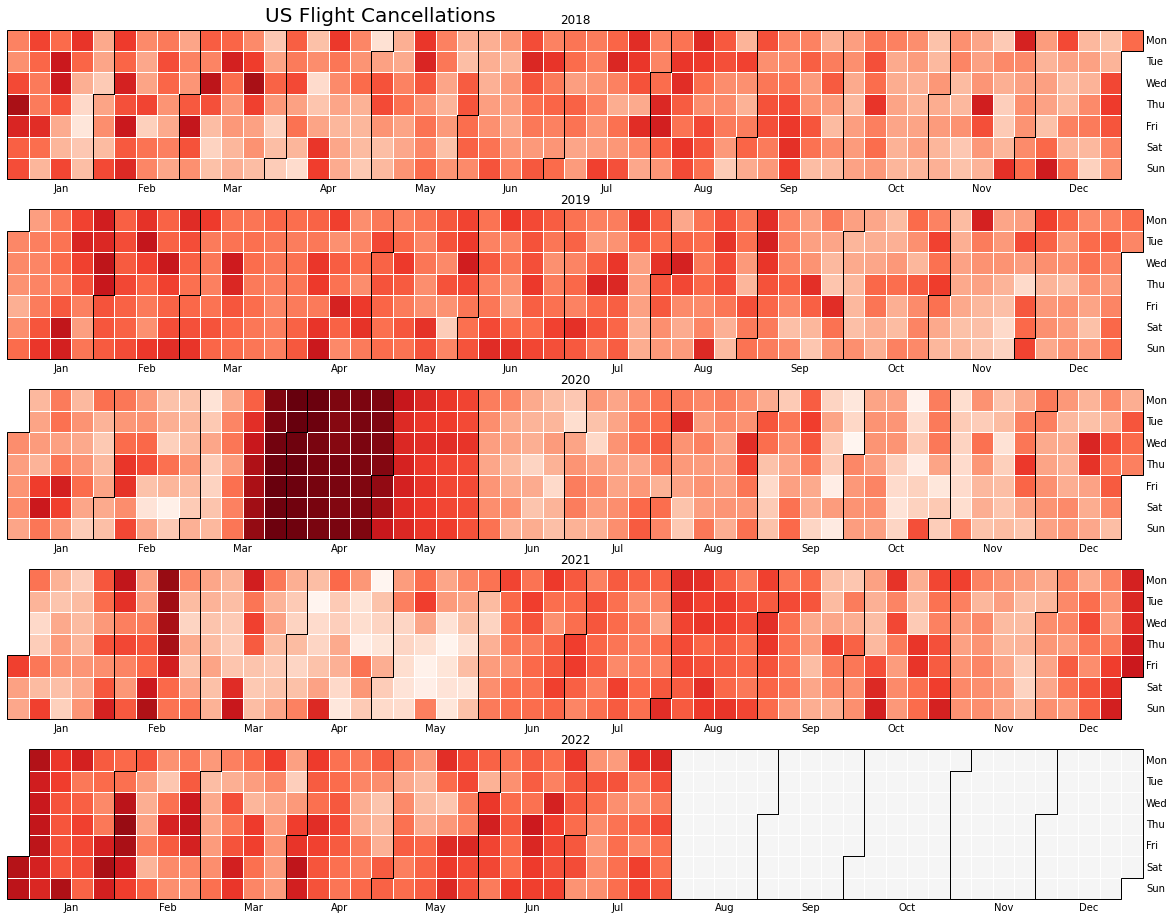

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(24,16))  # 5 rowa 1 column
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]): # -- for the full set  in case loaded. 
    calmap.yearplot(events.apply(np.log), year=year, monthly_border=True, ax=axs[i])
    axs[i].set_title(year)
fig.suptitle('US Flight Cancellations', x= 0.4, y=0.9, fontsize=20)

In [ ]:
# Plotly style plot
fig = calplot(events.reset_index(), x='FlightDate', dark_theme=True, y='Cancelled', width=1000, title='US Flight Cancellations')
fig.show()

### 9. Delay group per Airline

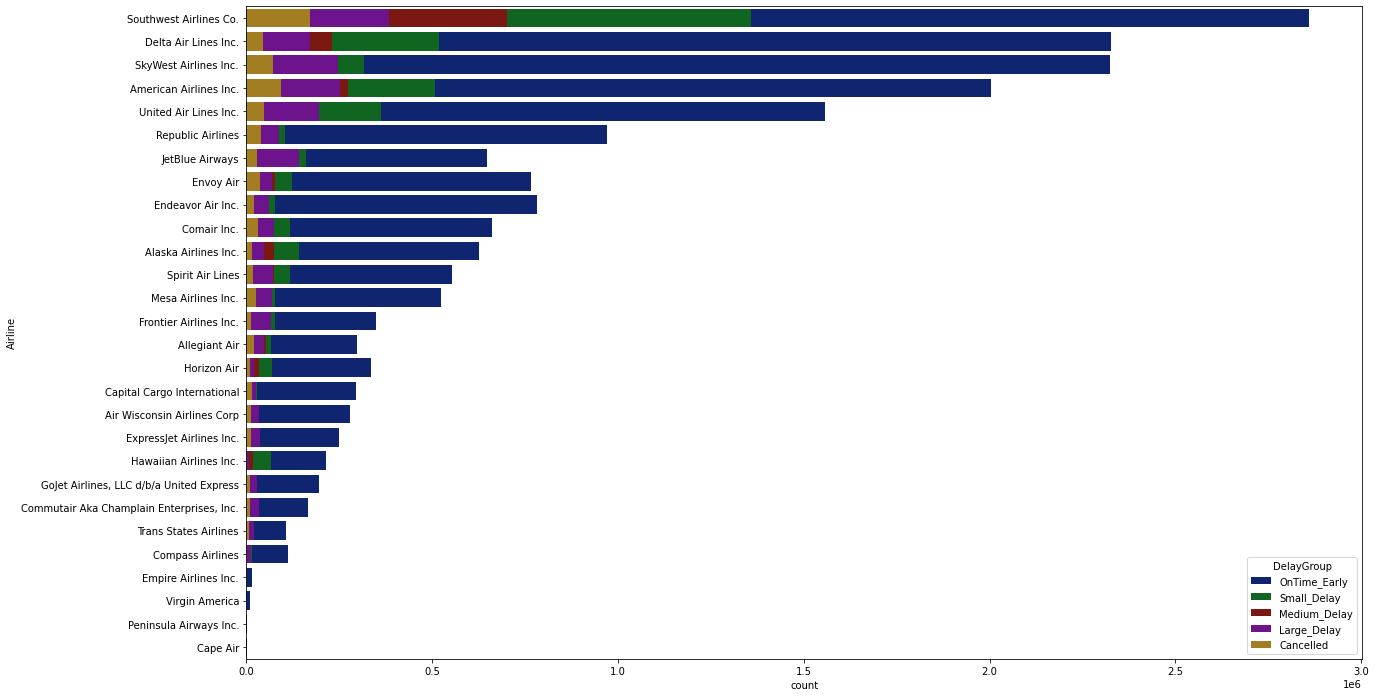

In [ ]:
# Delay categories per Airline.
plt.figure(figsize=(20,12))
airline_order = df['Airline'].value_counts().index.tolist()
sns.countplot(data=df, y='Airline', order=airline_order, hue='DelayGroup', dodge=False)
plt.show()

### 10. Top 10 worst performers (Lemons) 🍋

In [ ]:
df['Tail_Number'].nunique()

7089

In [ ]:
df[df['DelayGroup'] != 'OnTime_Early']['Tail_Number'].value_counts().head(10)

N962WN    4131
N928WN    4103
N931WN    4080
N969WN    4067
N937WN    4065
N966WN    4051
N935WN    4044
N964WN    4032
N968WN    4011
N930WN    4009
Name: Tail_Number, dtype: int64

## Next is to map the Tail_Number/Registration to Aircraft type & 
check for performnace per number of flights/ratio.

Thanks to Rob Mulla and his great videos.